# Harry Jannerone Needs Analysis

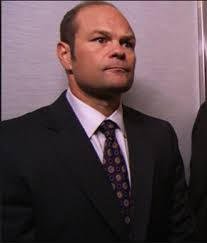

## Overview

This project analyzes the aviation accident data from the National Transportation Safety Board (NTSB) in order to determine which airplane model is the least risk for Harry Jannerone to sell. A descriptive analysis of injury rates determines that specific models of airplanes have fewer fatal, serious, and minor injuries when that model is involved in an accident versus other models.

## Business Understanding

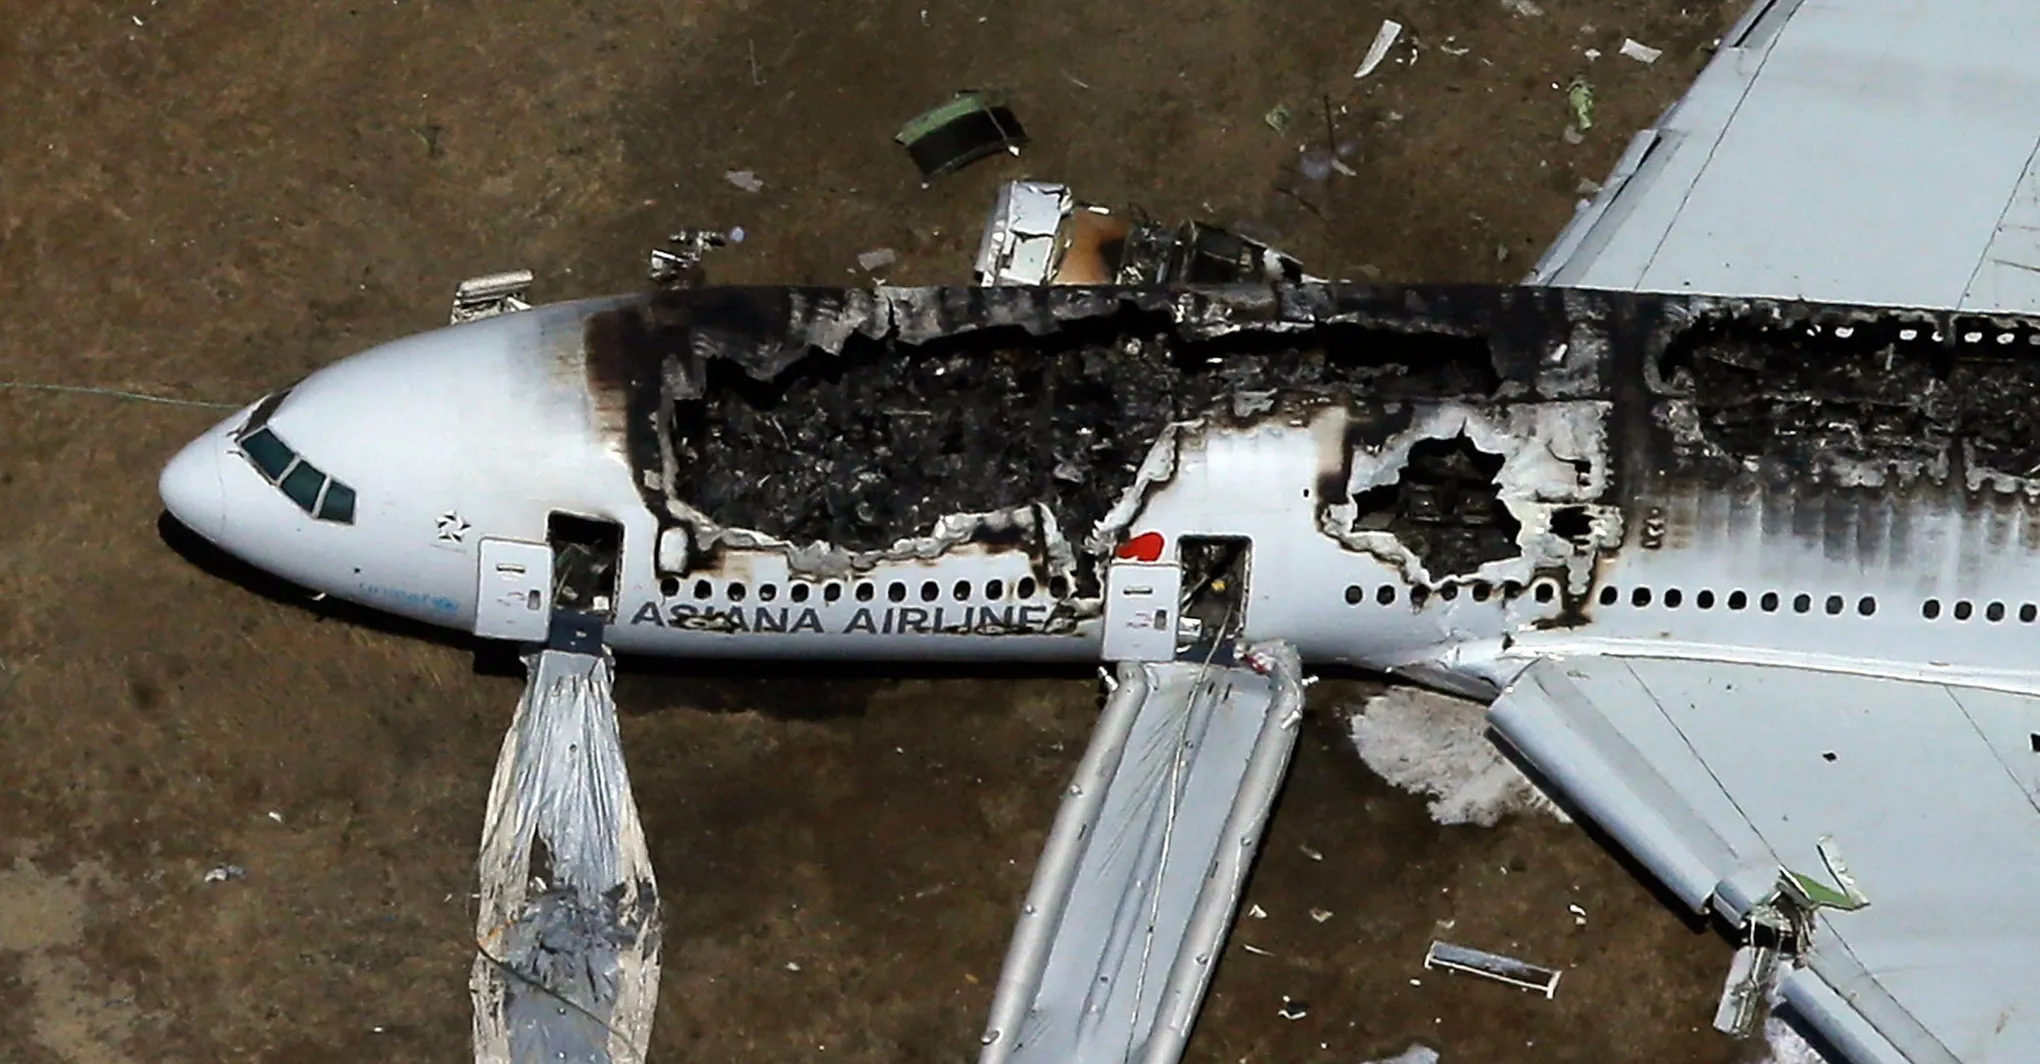

Harry Jannerone has just been laid off from Dunder Mifflin Paper Company and wants to accomplish his dream of selling one big thing, like an airplane, and then retiring. Whether caused by pilot error or mechanical problems, any person suffering from an injury or property loss because of a flying accident can take you to court. Therefore, Mr. Jannerone wants to know which airplane has the lowest risk for his endeavor. Using the accident data from the NTSB, I describe patterns in the number and types of injuries that occur in airplane accidents to determine which airplane model will have the lowest risk and give Mr. Jannerone a resource to use in his sales attempt. 

## Data Understanding

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.  Every accident has a unique ID associated with it.  The data files proved the date, location, airport, weather condition, injury information (fatal, serious, minor, uninjured), and aircraft information (make, model, number of engines, engine type, registration number, etc.).  These data are suitable for this project because Mr. Jannerone will be able to pitch to his clients the idea that if their airplane is to have an accident that they will be less liable for injuries if the airplane model they purchase has a history of being in accidents with uninjured passengers.  

In [498]:
#Import the necessary libraries
import pandas as pd
import numpy as np

#Workaround to eliminate an error warning when working with slices of dataframes
pd.options.mode.chained_assignment = None

In [499]:
#Load the data set Aviation_Data as ad
ad = pd.read_csv('Aviation_Data.csv', low_memory=False) 

### Inspect the Contents of the dataframe

In [500]:
ad.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [501]:
ad.shape

(90348, 31)

In [502]:
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Descriptive Statistics for Selected Features in Analysis

In [503]:
ad['Event.Id'].describe()

count              88889
unique             87951
top       20001212X19172
freq                   3
Name: Event.Id, dtype: object

In [504]:
ad['Make'].value_counts()

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
NORTHROP               1
GIBBS                  1
C&j Sontheimer         1
Charles Peet           1
Harwood Kenneth        1
Name: Make, Length: 8237, dtype: int64

In [505]:
ad['Model'].value_counts()

152                   2367
172                   1756
172N                  1164
PA-28-140              932
150                    829
                      ... 
RV-8F                    1
SPITFIRE/RAVEN           1
Rotorway INTL 162F       1
737-3K2                  1
U206-F                   1
Name: Model, Length: 12318, dtype: int64

In [506]:
ad['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [507]:
ad['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [508]:
ad['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [509]:
ad['Total.Fatal.Injuries'].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

In [510]:
ad['Total.Serious.Injuries'].describe()

count    76379.000000
mean         0.279881
std          1.544084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        161.000000
Name: Total.Serious.Injuries, dtype: float64

In [511]:
ad['Total.Minor.Injuries'].describe()

count    76956.000000
mean         0.357061
std          2.235625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        380.000000
Name: Total.Minor.Injuries, dtype: float64

In [512]:
ad['Total.Uninjured'].describe()

count    82977.000000
mean         5.325440
std         27.913634
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        699.000000
Name: Total.Uninjured, dtype: float64

I included all of these features because they will be useful in order to filter the aircraft data to the specific Make and Model of airplane that is the lowest risk for Mr. Jannerone to sell based the number and type of injuries that have occured in accidents involving these airplanes. 

## Data Preparation

In [513]:
#Drop features that are not relavent to the project
ad.drop(columns = ['Accident.Number', 'Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude', 
                  'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description', 
                  'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Longitude', 
                  'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Injury.Severity', 
                   'Aircraft.damage', 'Aircraft.Category'], inplace=True)

### Identify and Handle Missing Values

In [514]:
#Check for missing values
ad.isna().sum()

Event.Id                   1459
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
dtype: int64

In [515]:
#Drop duplicate values
ad = ad.drop_duplicates()

In [517]:
#Check again for missing values
ad.isna().sum()

Event.Id                      1
Make                         64
Model                        93
Amateur.Built               103
Number.of.Engines          6078
Engine.Type                7075
Total.Fatal.Injuries      11391
Total.Serious.Injuries    12493
Total.Minor.Injuries      11917
Total.Uninjured            5908
dtype: int64

I dropped all of the missing values from Event Id, Make, Model, Amateur Built, Number of Engines, and Engine Type.  These are key features to my analysis and by dropping these rows it reduces the possibility of changing the meaningfulness of the data. I decided to replace the missing values from the injury features with zeros.

In [518]:
#Drop the missing values from these features
ad.dropna(subset=['Event.Id', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type'], inplace=True)

In [522]:
#Replace the remaining missing values with 0
ad = ad.fillna(0)

### Identify and Handle Text Data Requiring Cleaning

In [526]:
#Make all string formatting the same
ad = ad.applymap(lambda x: x.capitalize() if type(x) == str else x)

### Feature Engineering

I created a 'Percent.Uninjured' feature to analyze the percentage of the total passengers who are uninjured in an accident. 

In [543]:
ad['Percent.Uninjured'] = ad['Total.Uninjured'] / (ad['Total.Uninjured'] + ad['Total.Fatal.Injuries'] +
                          ad['Total.Serious.Injuries']+ad['Total.Minor.Injuries'])

In [540]:
ad.to_csv('Prepared_Aircraft_Data.csv')

## Data Analysis

In [541]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Amateur vs. Professional

A higher percentage of passengers who are flying in professionally-built aircraft are uninjured than passengers flying in amateurly built aircraft.  I recommend that Mr. Jannerone sell a professionally-built aircraft.  

In [547]:
ad.groupby(['Amateur.Built']).mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
Amateur.Built,,,,,,
No,1.165772,0.415692,0.217535,0.303383,4.648827,0.612949
Yes,1.004676,0.351744,0.227882,0.229651,0.671259,0.398115


In [548]:
# new dataset without amateur-built airplanes
ad_professional = ad[ad['Amateur.Built']=='No']
ad_professional.head()

,Event.Id,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
0,20001218x45444,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,0.000000
1,20001218x45447,Piper,Pa24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,0.000000
2,20061025x01555,Cessna,172m,No,1.0,Reciprocating,3.0,0.0,0.0,0.0,0.000000
3,20001218x45448,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,0.000000
5,20170710x52551,Mcdonnell douglas,Dc9,No,2.0,Turbo fan,0.0,0.0,1.0,44.0,0.977778


### Percent Uninjured by Number of Engines

A higher percentage of passengers who are flying in professionally-built, 3 or 4 engine aircrafts than any other number of engines.  I recommend that Mr. Jannerone sell a 3 or 4 engine aircraft. 

In [550]:
#Number of engines versus average percent of uninjured passengers
ad_professional.groupby(['Number.of.Engines']).mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
Number.of.Engines,,,,,
0.0,0.468217,0.376744,0.365891,3.617054,0.571350
1.0,0.306489,0.194765,0.259586,1.116906,0.605901
2.0,0.849913,0.302290,0.415432,16.709063,0.633474
3.0,1.489316,0.700855,2.495726,108.551282,0.937462
4.0,4.174684,0.551899,1.283544,100.822785,0.840161
8.0,0.000000,7.000000,1.000000,3.666667,0.294408


In [553]:
#Make a new dataset using only three and four engine aircraft
ad_three_four = ad_professional[(ad_professional['Number.of.Engines'] == 3.0)|(ad_professional['Number.of.Engines'] == 4.0)]
ad_three_four.head()

,Event.Id,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
79,20020917x01897,Lockheed,L-1011,No,3.0,Turbo fan,0.0,0.0,0.0,149.0,1.000000
129,20020917x02397,Canadair,Cl-44d4,No,4.0,Turbo prop,0.0,0.0,0.0,6.0,1.000000
155,20020917x01909,Mcdonnell douglas,Dc-10-30,No,3.0,Turbo fan,2.0,4.0,24.0,182.0,0.858491
230,20020917x01910,Mcdonnell-douglas,Dc-10-10,No,3.0,Turbo fan,0.0,1.0,0.0,154.0,0.993548
344,20020917x02404,Boeing,727-235,No,3.0,Turbo fan,0.0,1.0,1.0,51.0,0.962264


### Percent Uninjured by Engine Type

The highest number of uninjured passengers were flying in Turbo Fan and Turbo Jet Engines. I recommend that Mr. Jannerone sell one of these types of aircrafts. 

In [554]:
ad_three_four.groupby(['Engine.Type']).mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
Engine.Type,,,,,,
Electric,4.000000,0.000000,0.000000,0.000000,1.666667,1.000000
None,4.000000,0.000000,0.000000,1.000000,14.000000,0.933333
Reciprocating,3.916667,0.950000,0.233333,0.416667,2.183333,0.675611
Turbo fan,3.403654,3.146179,0.822259,2.475083,125.780731,0.921200
Turbo jet,3.326667,1.906667,0.206667,0.886667,91.940000,0.917686
Turbo prop,4.000000,2.842105,0.157895,0.578947,7.842105,0.700844
Turbo shaft,3.000000,1.000000,0.000000,0.000000,4.000000,0.800000
Unknown,3.750000,0.000000,0.000000,0.500000,83.000000,0.972917


In [556]:
#Create a new dataset that only includes Turbo Fan and Turbo Jet
ad_turbo = ad_three_four[(ad_three_four['Engine.Type'] == 'Turbo fan') | (ad_three_four['Engine.Type'] == 'Turbo jet')]
ad_turbo.head()

,Event.Id,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
79,20020917x01897,Lockheed,L-1011,No,3.0,Turbo fan,0.0,0.0,0.0,149.0,1.000000
155,20020917x01909,Mcdonnell douglas,Dc-10-30,No,3.0,Turbo fan,2.0,4.0,24.0,182.0,0.858491
230,20020917x01910,Mcdonnell-douglas,Dc-10-10,No,3.0,Turbo fan,0.0,1.0,0.0,154.0,0.993548
344,20020917x02404,Boeing,727-235,No,3.0,Turbo fan,0.0,1.0,1.0,51.0,0.962264
351,20020917x02151,Boeing,B-727-200,No,3.0,Turbo jet,0.0,0.0,0.0,83.0,1.000000


### Percent Uninjured by Make

Airbus and Ilyushin and the only makes with 95% or more of their passengers being uninjured in flight that also had at least 30 passengers involved in accidents.  I'm going to recommend Mr. Jannerone try and sell an Airbus model since Ilyushin has been merged by the Russian government into a different company. 

In [573]:
ad_turbo.groupby('Make').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
Make,,,,,,
Airbus,4.000000,0.000000,0.857143,6.428571,277.428571,0.963805
Antonov,4.000000,0.000000,0.000000,2.000000,4.000000,0.666667
Bae,4.000000,0.000000,0.000000,0.000000,0.500000,1.000000
Boeing,3.418708,3.158129,0.681514,1.576837,126.697105,0.936114
British aerospace,4.000000,1.869565,0.086957,0.173913,51.826087,0.943289
Dassault,3.000000,0.380952,0.238095,0.238095,5.857143,0.852910
De havilland,4.000000,0.000000,0.000000,0.000000,25.000000,1.000000
Douglas,3.698113,5.226415,0.283019,2.207547,60.150943,0.792365
Ilyushin,4.000000,0.000000,0.000000,1.000000,249.000000,0.996000


In [572]:
#I reformated all of the names so that the same company written differently would have all of their data combined
ad_turbo["Make"] = ad_turbo["Make"].apply(lambda x: "Airbus" if "bus" in x else x)
ad_turbo["Make"] = ad_turbo["Make"].apply(lambda x: "Bae" if "Bae" in x else x)
ad_turbo["Make"] = ad_turbo["Make"].apply(lambda x: "British aerospace" if "Brit" in x else x)
ad_turbo["Make"] = ad_turbo["Make"].apply(lambda x: "Dassault" if "Das" in x else x)
ad_turbo["Make"] = ad_turbo["Make"].apply(lambda x: "Mcdonnell-douglas" if "Mcd" in x else x)

### Percent Uninjured by Model

Over 95% of the passengers who are involved in an accident on either of the two Airbus models have been uninjured.  I am going to recommend either of these models to Mr. Jannerone to try and sell. 

In [574]:
#I made a new dataset for just Airbus
ad_airbus = ad_turbo[(ad_turbo['Make']=='Airbus')]
ad_airbus.groupby('Model').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
Model,,,,,,
A-340,4.0,0.0,0.0,0.0,249.0,1.000000
A-340-200,4.0,0.0,4.0,2.0,70.0,0.921053
A-340-300,4.0,0.0,0.0,0.0,252.0,1.000000
A340 - 300,4.0,0.0,0.0,0.0,397.0,1.000000
A340-300,4.0,0.0,1.0,21.5,199.0,0.912791
A380,4.0,0.0,0.0,0.0,576.0,1.000000


In [576]:
#I combined all of the variation of the A-340 models into one name
ad_airbus["Model"] = ad_turbo["Model"].apply(lambda x: "A-340" if "340" in x else x)

In [578]:
ad_airbus.groupby('Model').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Percent.Uninjured
Model,,,,,,
A-340,4.0,0.0,1.0,7.5,227.666667,0.957772
A380,4.0,0.0,0.0,0.0,576.000000,1.000000


## Conclusions

This analysis leads to three recommendations for choosing an airplane for Mr. Jannerone to sell. 

-  __Do not attempt to sell a small single or double engine aircraft__  Over 40% of the people who have been involved in an accident in a one or two engine plane have been injured. A three or four engine airplane will have the lowest risk for passengers being injured if they are in an accident. 
***
- __Sell a turbo fan or a turbo jet engine airplane__  Over 90% of the passengers who are involved in an accident while flying in a three or four engine airplane that has a turbo fan or a turbo jet engine are uninjured in the accident. This will provide the least amount of risk for Mr. Jannerone. 
***
- __Sell an Airbus A-340 or A380__ Mr. Jannerone will have a huge selling point to make to future investors if he works with Airbus.  Only 4% of the passengers on Airbus A-340 models have been injured in accedents and nobody has been injured in any accidents that occured in an Airbus 380.  



## Next Steps

Further analyses could yield additional insights into the decision for which type of Airplane Mr. Jannerone should sell: 

- __Better understanding of low risk airplanes from data on planes that aren't in accidents__  Modeling the percentage of airplane models that take flights and aren't involved in accidents may give a better understanding of which planes are the lowest risk. 
***
- __Predicting accident scenarios by airplane model__ This modeling could make it possible to lower the risk of all airplane models by helping fewer people be injured in accidents. 
***
- __Model Pilot Data__ This modeling could use already available data to see how much of the airplane risk is the model of the airplane and how much has to do with pilot training, flight hours, crew rest, etc. 